# Hierarchical Clustering

In [11]:
from IPython.display import Image
Image(url='https://miro.medium.com/max/257/0*iozEcRXXWXbDMrdG.gif')

Hierarchical Clustering has two types of approaches:
1.   **Agglomerative clustering** (focusing on this one)
2.   **Divisive clustering**

**Agglomerative clustering**: starting with each individual point representing a cluster and gradually merging them into one cluster based on the distance. Here are the steps:
1.   Make **each data point** a cluster - n clusters
2.   **Merge two clusters together** based on the **similarity** between clusters - n - 1 clusters
3.   Repeat above step until only one cluster left.


### Ways to calculate the similarity between clusters


*   **Complete Linkage** - the **maximum** distance of all pairwise distance between two clusters
*   **Simple Linkage** - the **minimum** distance of all pairwise distance between two clusters
*   **Average Linkage** - the **averaged** distance of all pairwise distance between two clusters
*   **Centroid Linkage** - the distance between the **centroids** (point of **averaged value within the cluster**) of two clusters
*   **Ward's Method** - the **difference** between the **total of sum of squares in each cluster** and the **sum of squares of combined two clusters**.



### Use dendrogram to determine the optimal number of clusters

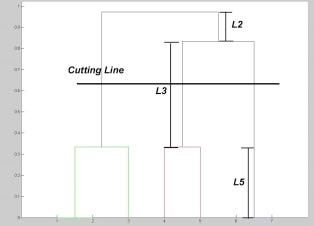

**Dendrogram** is a type of tree diagram showing hierarchical clustering and as shown on the above diagram, **any horizontal line represents a cluster and the vertical line represents the dissimiliarity between two clusters.** To find the optimal number of clusters, we simply need to **find the maximum dissimiliarity** between two horizontal lines **without intersecting other horizontal lines** and draw a line in this region; thus, **number of vertical lines it intersects** is the optimal number of clusters.

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [4]:
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, 3:].values

## Using the dendrogram to find the optimal number of clusters

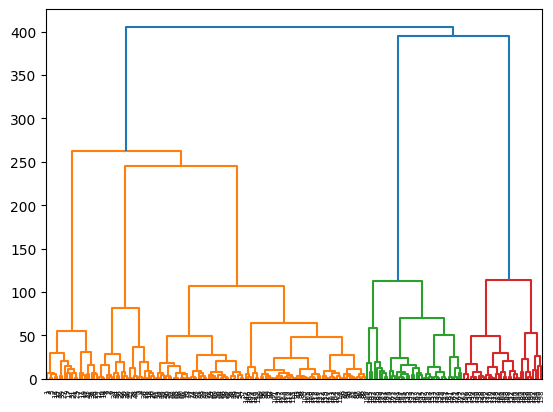

In [12]:
import scipy.cluster.hierarchy as sch
#sch.linkage() determines which method to use to calculate the distance between clusters
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.show()

## Training the Hierarchical Clustering model on the dataset

In [8]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y = hc.fit_predict(X)
print(y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 1 2
 0 2 0 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


## Visualising the clusters

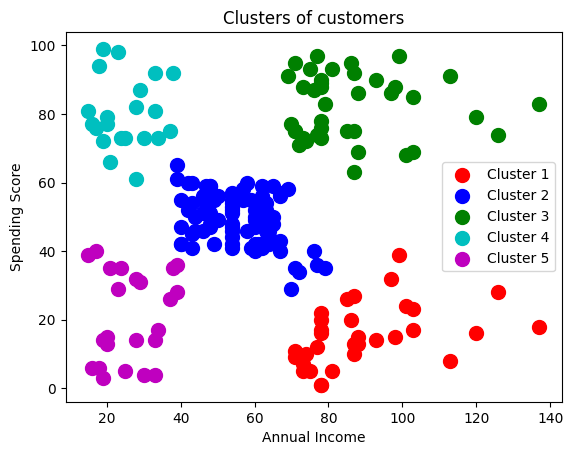

In [9]:
plt.scatter(X[y==0, 0], X[y==0, 1], s=100, c='r', label='Cluster 1')
plt.scatter(X[y==1, 0], X[y==1, 1], s=100, c='b', label='Cluster 2')
plt.scatter(X[y==2, 0], X[y==2, 1], s=100, c='g', label='Cluster 3')
plt.scatter(X[y==3, 0], X[y==3, 1], s=100, c='c', label='Cluster 4')
plt.scatter(X[y==4, 0], X[y==4, 1], s=100, c='m', label='Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()